# Table of Content
* [1.Descrizione dataset](#1.Descrizione-dataset)
* [2.Import librerie e dati](#2.Import-librerie-e-dati)
* [3.Analisi esplorativa dei dati](#3.Analisi-esplorativa-dei-dati)
    * [3.1.Consegne](#3.1.Consegne)
    * [3.2.Somministrazioni](#3.2.Somministrazioni)

## 1.Descrizione dataset

Il seguente dataset è riferito ai dati ufficiali del governo italiano, disponibili su https://github.com/italia/covid19-opendata-vaccini

Nella cartella dati si possono trovare 6 tabelle in formato json e csv:


*   **consegne-vaccini-latest**: dati sul totale delle consegne giornaliere dei vaccini suddivise per regioni.
*   **vaccini-summary-latest**: dati sul totale delle consegne e somministrazioni avvenute sino ad oggi, includendo la percentuale di dosi somministrate (sul totale delle dosi consegnate) suddivise per regioni.
*   **somministrazioni-vaccini-latest**: dati sulle somministrazioni giornaliere dei vaccini suddivisi per regioni, fasce d'età e categorie di appartenenza dei soggetti vaccinati.
*   **somministrazioni-vaccini-summary-latest**: dati sul totale delle somministrazioni giornaliere per regioni e categorie di appartenenza dei soggetti vaccinati.
*   **punti-somministrazione-latest**: punti di somministrazione per ciascuna Regione e Provincia Autonoma.
*   **anagrafica-vaccini-summary-latest**: totali delle somministrazioni per fasce d'età.

## 2.Import librerie e dati

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,10)

import seaborn as sns
sns.set()

import utils as u

In [2]:
df_consegne = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv', 
                          parse_dates=['data_consegna'])

In [3]:
df_vaccini_aree_summary = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/vaccini-summary-latest.csv')

In [4]:
df_somministrazioni = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv',
                                  parse_dates=['data_somministrazione'])

In [5]:
df_punti_somministraz = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/punti-somministrazione-tipologia.csv')

In [6]:
df_vaccini_fasce_summary = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/anagrafica-vaccini-summary-latest.csv')

## 3.Analisi esplorativa dei dati

### 3.1.Consegne

In [7]:
df_consegne.shape

(1101, 8)

In [8]:
df_consegne.tail()

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
1096,VEN,Janssen,12800,2021-05-01,ITH,ITH3,5,Veneto
1097,VEN,Moderna,20500,2021-05-01,ITH,ITH3,5,Veneto
1098,VEN,Vaxzevria (AstraZeneca),151100,2021-05-01,ITH,ITH3,5,Veneto
1099,VEN,Pfizer/BioNTech,171990,2021-05-05,ITH,ITH3,5,Veneto
1100,VEN,Moderna,29300,2021-05-07,ITH,ITH3,5,Veneto


In [9]:
df_consegne.columns

Index(['area', 'fornitore', 'numero_dosi', 'data_consegna', 'codice_NUTS1',
       'codice_NUTS2', 'codice_regione_ISTAT', 'nome_area'],
      dtype='object')

In [10]:
tot_consegne = df_consegne.numero_dosi.sum()
tot_consegne

27429090

In [11]:
df_consegne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   area                  1101 non-null   object        
 1   fornitore             1101 non-null   object        
 2   numero_dosi           1101 non-null   int64         
 3   data_consegna         1101 non-null   datetime64[ns]
 4   codice_NUTS1          1101 non-null   object        
 5   codice_NUTS2          1101 non-null   object        
 6   codice_regione_ISTAT  1101 non-null   int64         
 7   nome_area             1101 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 68.9+ KB


In [12]:
df_consegne_t = df_consegne.set_index('data_consegna')
df_consegne_t.head()

,area,fornitore,numero_dosi,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
data_consegna,,,,,,,
2020-12-27,ABR,Pfizer/BioNTech,135,ITF,ITF1,13,Abruzzo
2020-12-30,ABR,Pfizer/BioNTech,7800,ITF,ITF1,13,Abruzzo
2021-01-05,ABR,Pfizer/BioNTech,3900,ITF,ITF1,13,Abruzzo
2021-01-07,ABR,Pfizer/BioNTech,3900,ITF,ITF1,13,Abruzzo
2021-01-11,ABR,Pfizer/BioNTech,3900,ITF,ITF1,13,Abruzzo


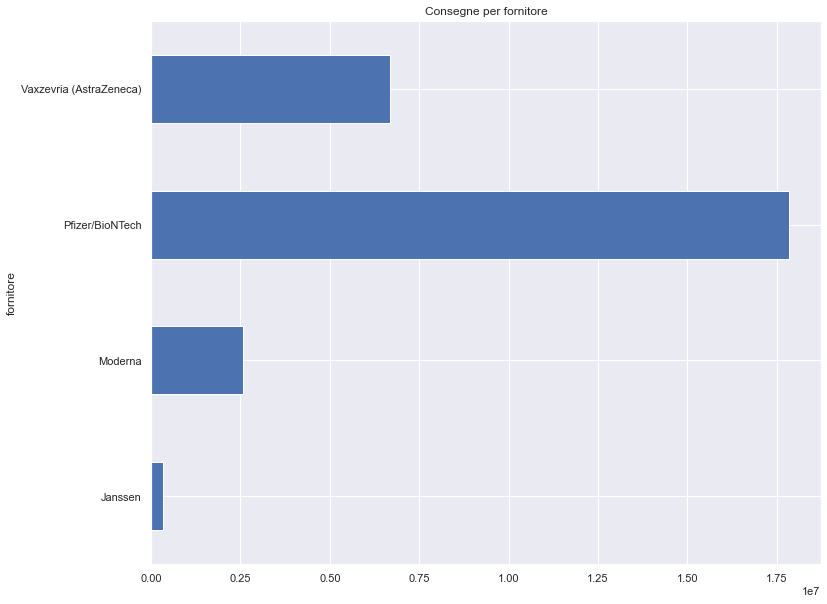

In [13]:
df_consegne.groupby('fornitore')['numero_dosi']\
            .sum()\
            .plot(kind='barh',
                  title='Consegne per fornitore')
plt.show()

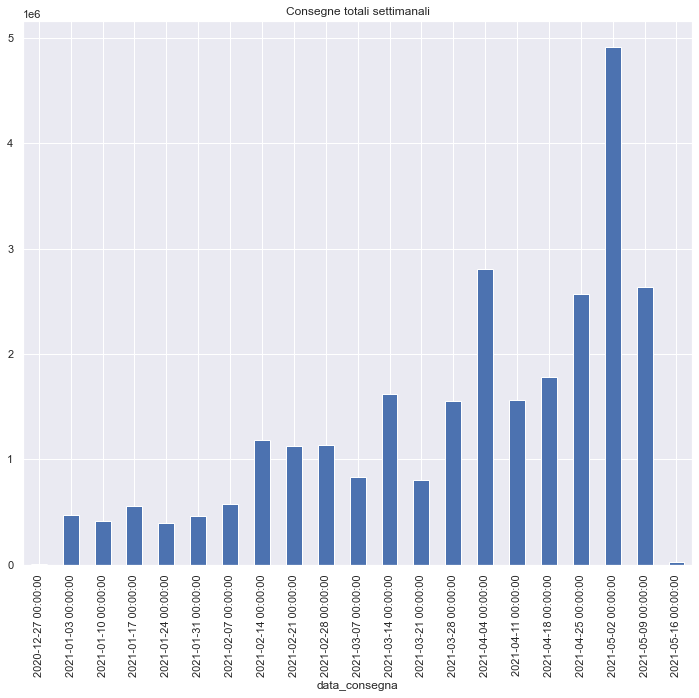

In [14]:
df_consegne_t.resample('W').sum()['numero_dosi'].plot(kind='bar', title='Consegne totali settimanali')
plt.show()

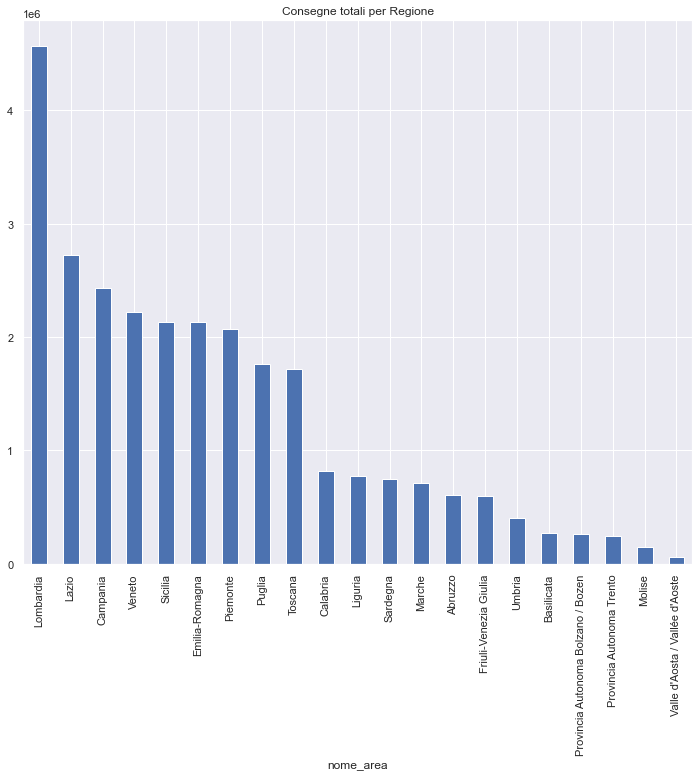

In [15]:
df_consegne.groupby('nome_area')\
            .sum()['numero_dosi']\
            .sort_values(ascending=False)\
            .plot(kind='bar',
                    title='Consegne totali per Regione')
plt.show()

In [16]:
df_consegne_sett = u.get_dfsettimanale_from_df(df_consegne_t, 'fornitore', 'numero_dosi')
df_consegne_sett

,numero_dosi,fornitore
data_consegna,,
2020-12-27,9750,Pfizer/BioNTech
2021-01-03,469950,Pfizer/BioNTech
2021-01-10,419250,Pfizer/BioNTech
2021-01-17,510900,Pfizer/BioNTech
2021-01-24,397800,Pfizer/BioNTech
...,...,...
2021-04-11,0,Janssen
2021-04-18,0,Janssen
2021-04-25,179800,Janssen


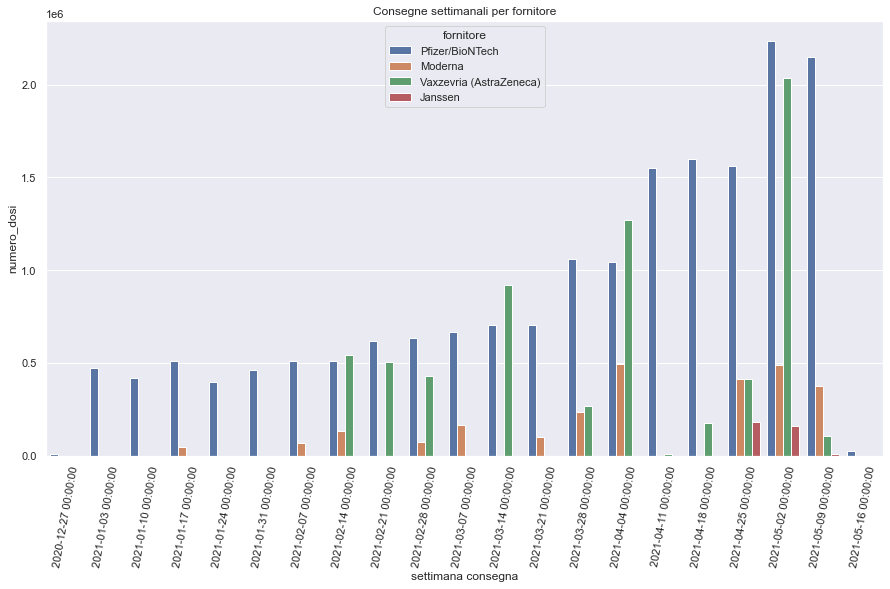

In [17]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
myFmt = DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data = df_consegne_sett, x=df_consegne_sett.index, y='numero_dosi', hue='fornitore',ci=None, ax=ax)
plt.title('Consegne settimanali per fornitore')
plt.xticks(rotation=80)
plt.xlabel('settimana consegna')
# ax.xaxis.set_major_formatter(myFmt)
plt.show()

### 3.2.Somministrazioni

In [18]:
df_somministrazioni.shape

(49122, 22)

In [19]:
df_somministrazioni.tail()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_60_69,...,categoria_forze_armate,categoria_personale_scolastico,categoria_soggetti_fragili,categoria_altro,prima_dose,seconda_dose,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
49117,2021-05-11,Vaxzevria (AstraZeneca),VEN,50-59,48,93,0,2,0,0,...,0,85,2,52,53,88,ITH,ITH3,5,Veneto
49118,2021-05-11,Vaxzevria (AstraZeneca),VEN,60-69,2449,2168,2,9,0,4371,...,1,57,22,155,4582,35,ITH,ITH3,5,Veneto
49119,2021-05-11,Vaxzevria (AstraZeneca),VEN,70-79,263,258,0,0,0,0,...,0,0,3,0,518,3,ITH,ITH3,5,Veneto
49120,2021-05-11,Vaxzevria (AstraZeneca),VEN,80-89,4,6,0,0,0,0,...,0,0,0,0,10,0,ITH,ITH3,5,Veneto
49121,2021-05-11,Vaxzevria (AstraZeneca),VEN,90+,0,1,0,0,0,0,...,0,0,0,0,1,0,ITH,ITH3,5,Veneto


In [20]:
df_somministrazioni.columns

Index(['data_somministrazione', 'fornitore', 'area', 'fascia_anagrafica',
       'sesso_maschile', 'sesso_femminile',
       'categoria_operatori_sanitari_sociosanitari',
       'categoria_personale_non_sanitario', 'categoria_ospiti_rsa',
       'categoria_60_69', 'categoria_70_79', 'categoria_over80',
       'categoria_forze_armate', 'categoria_personale_scolastico',
       'categoria_soggetti_fragili', 'categoria_altro', 'prima_dose',
       'seconda_dose', 'codice_NUTS1', 'codice_NUTS2', 'codice_regione_ISTAT',
       'nome_area'],
      dtype='object')

In [21]:
df_somministrazioni['totale'] = df_somministrazioni['sesso_maschile'] + df_somministrazioni['sesso_femminile']

In [22]:
totale_somministrazioni = df_somministrazioni['totale'].sum()
totale_somministrazioni

24950456

In [23]:
df_somministrazioni_t = df_somministrazioni.set_index('data_somministrazione')

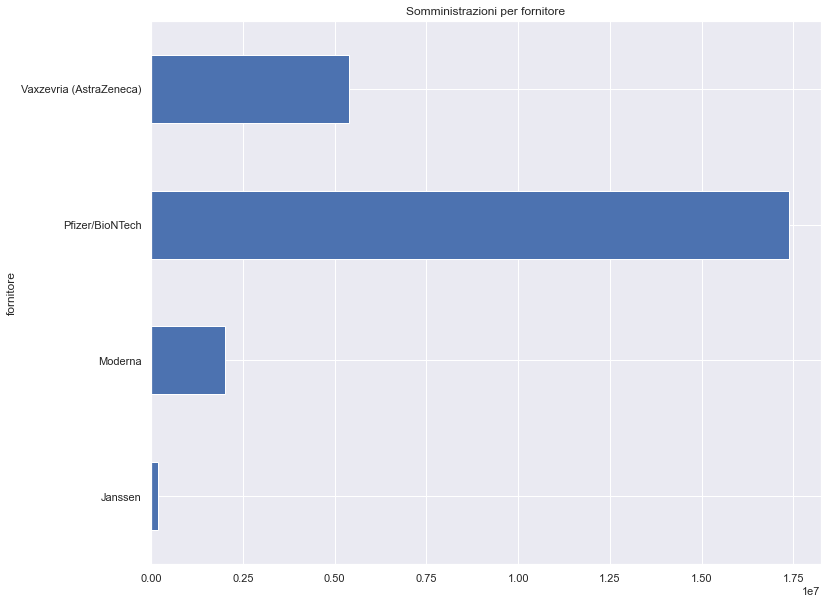

In [24]:
df_somministrazioni.groupby('fornitore')['totale']\
            .sum()\
            .plot(kind='barh',
                  title='Somministrazioni per fornitore')
plt.show()

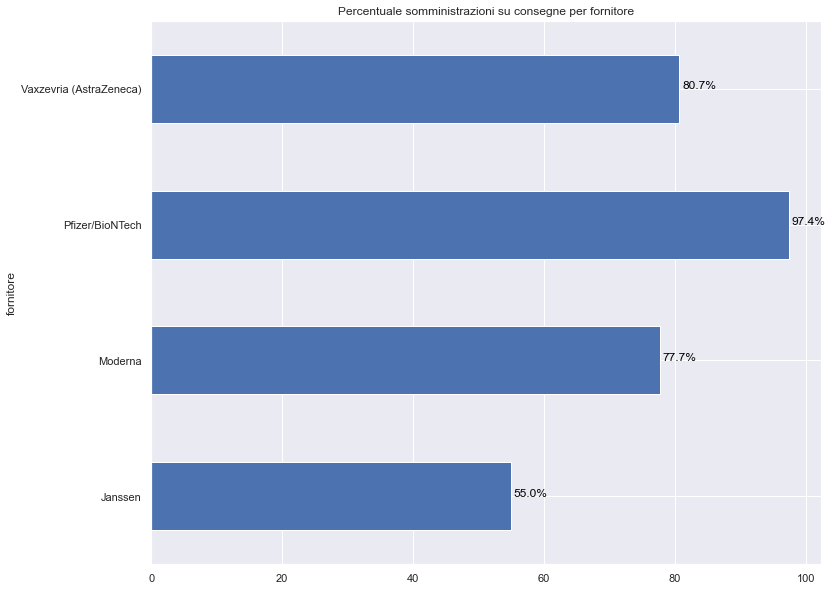

In [25]:
somministrazioni_consegne_forn = df_somministrazioni.groupby('fornitore')['totale'].sum()/df_consegne.groupby('fornitore')['numero_dosi'].sum()
somministrazioni_consegne_forn = round(somministrazioni_consegne_forn*100, 1)
somministrazioni_consegne_forn.plot(kind='barh', title='Percentuale somministrazioni su consegne per fornitore')
for index, row in enumerate(somministrazioni_consegne_forn):
    plt.text(x = row+3 , y=index, s=f'{row}%', color='black', ha="center")
plt.show()

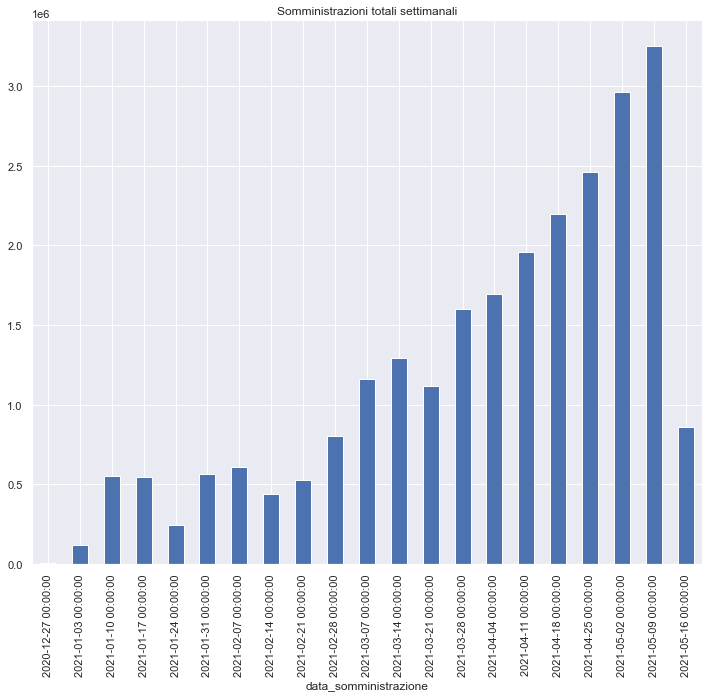

In [26]:
df_somministrazioni_t.resample('W').sum()['totale'].plot(kind='bar', title='Somministrazioni totali settimanali')

plt.show()

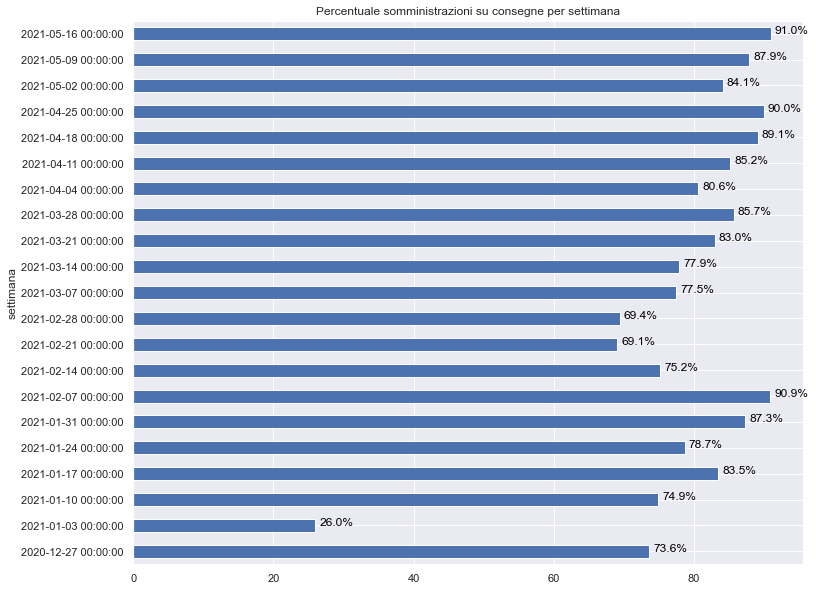

In [27]:
somministrazioni_consegne_sett = df_somministrazioni_t.resample('W').sum()['totale'].cumsum()/df_consegne_t.resample('W').sum()['numero_dosi'].cumsum()
somministrazioni_consegne_sett = round(somministrazioni_consegne_sett*100, 1)
somministrazioni_consegne_sett.plot(kind='barh', title='Percentuale somministrazioni su consegne per settimana')
for index, row in enumerate(somministrazioni_consegne_sett):
    plt.text(x = row+3 , y=index, s=f'{row}%', color='black', ha="center")
plt.ylabel('settimana')
plt.show()

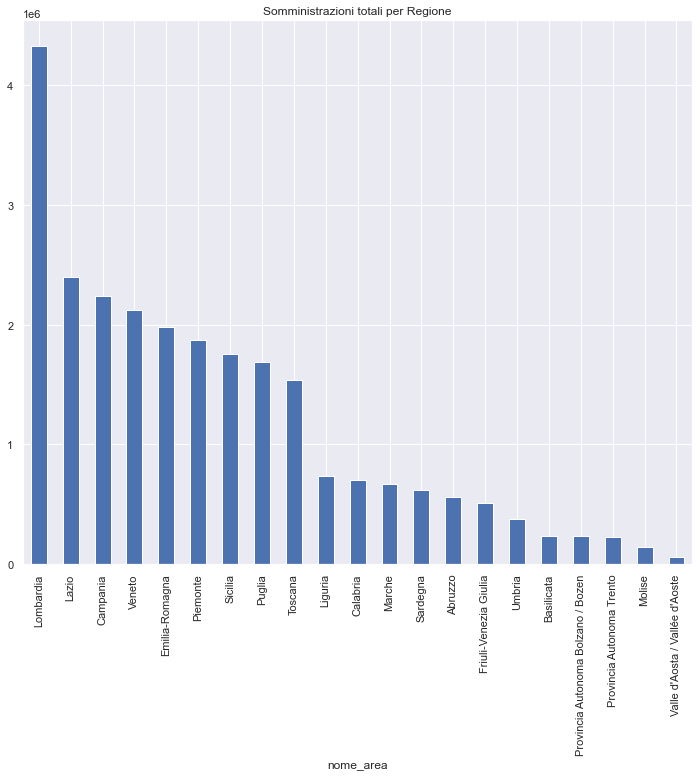

In [28]:
df_somministrazioni.groupby('nome_area')\
            .sum()['totale']\
            .sort_values(ascending=False)\
            .plot(kind='bar',
                    title='Somministrazioni totali per Regione')
plt.show()

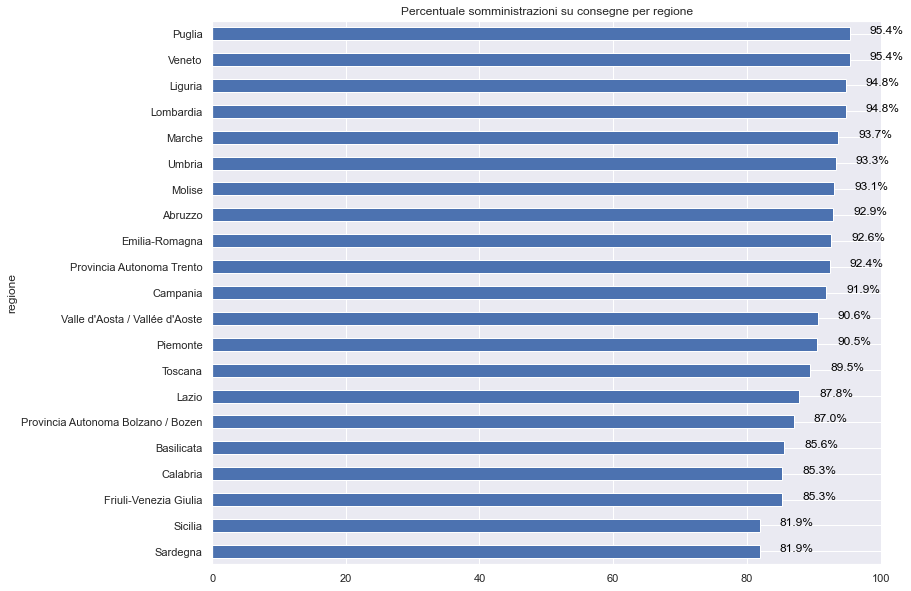

In [29]:
somministrazioni_consegne_regioni = df_somministrazioni.groupby('nome_area').sum()['totale']/df_consegne.groupby('nome_area').sum()['numero_dosi']
somministrazioni_consegne_regioni = round(somministrazioni_consegne_regioni.sort_values()*100, 1)
somministrazioni_consegne_regioni.plot(kind='barh', title='Percentuale somministrazioni su consegne per regione')
for index, row in enumerate(somministrazioni_consegne_regioni):
    plt.text(x = row+3 , y=index, s=f'{row}%', color='black')
plt.ylabel('regione')
plt.show()

In [30]:
df_somministrazioni_sett = u.get_dfsettimanale_from_df(df_somministrazioni_t, 'fornitore', 'totale')
df_somministrazioni_sett

,totale,fornitore
data_somministrazione,,
2020-12-27,7179,Pfizer/BioNTech
2021-01-03,117396,Pfizer/BioNTech
2021-01-10,549046,Pfizer/BioNTech
2021-01-17,540860,Pfizer/BioNTech
2021-01-24,229368,Pfizer/BioNTech
...,...,...
2021-04-18,1,Janssen
2021-04-25,12600,Janssen
2021-05-02,78380,Janssen


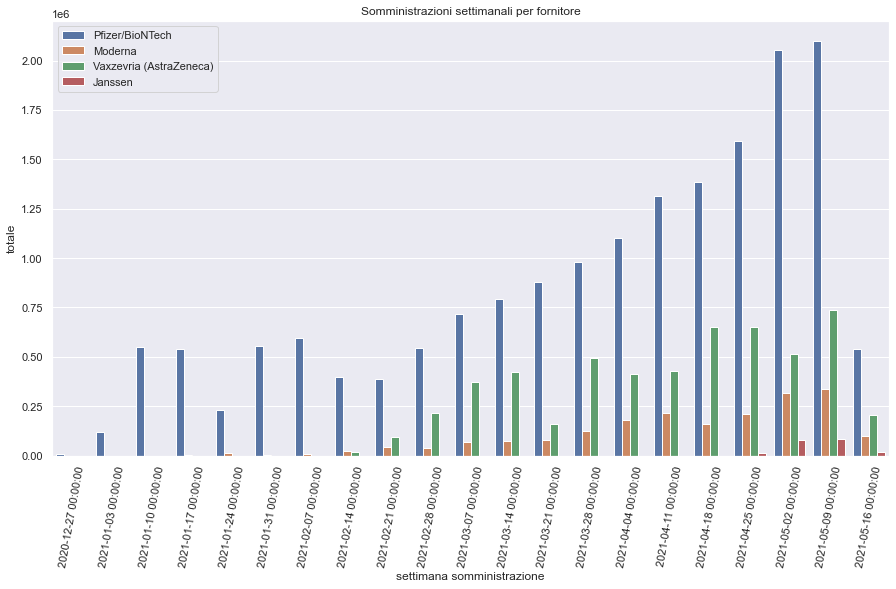

In [31]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data = df_somministrazioni_sett, x=df_somministrazioni_sett.index, y='totale', hue='fornitore',ci=None, ax=ax)
plt.title('Somministrazioni settimanali per fornitore')
plt.xticks(rotation=80)
plt.legend(loc='upper left')
plt.xlabel('settimana somministrazione')
# ax.xaxis.set_major_formatter(myFmt)
plt.show()

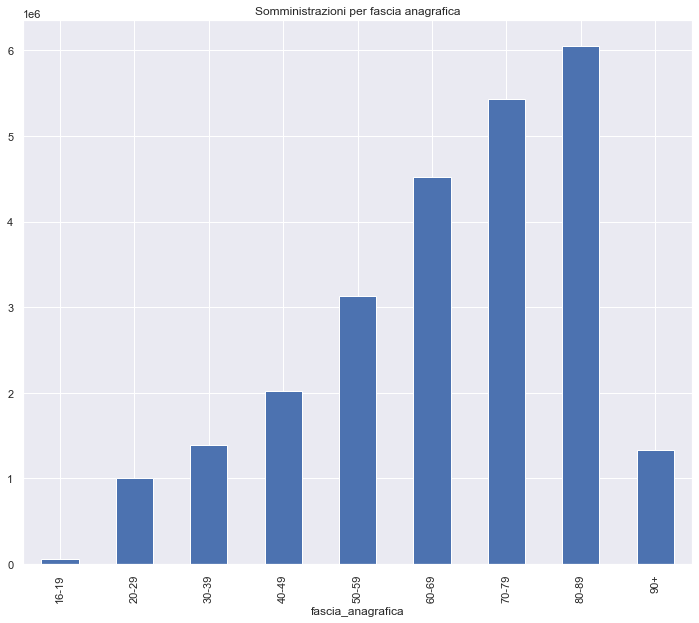

In [32]:
df_somministrazioni.groupby('fascia_anagrafica')['totale'].sum().plot(kind='bar')
plt.title('Somministrazioni per fascia anagrafica')
plt.show()

In [34]:
categorie = ['categoria_operatori_sanitari_sociosanitari',
       'categoria_personale_non_sanitario', 'categoria_ospiti_rsa',
       'categoria_60_69', 'categoria_70_79', 'categoria_over80',
       'categoria_forze_armate', 'categoria_personale_scolastico',
       'categoria_soggetti_fragili', 'categoria_altro']

In [47]:
d = {}
for c in categorie:
    d[c] = df_somministrazioni[c].sum()

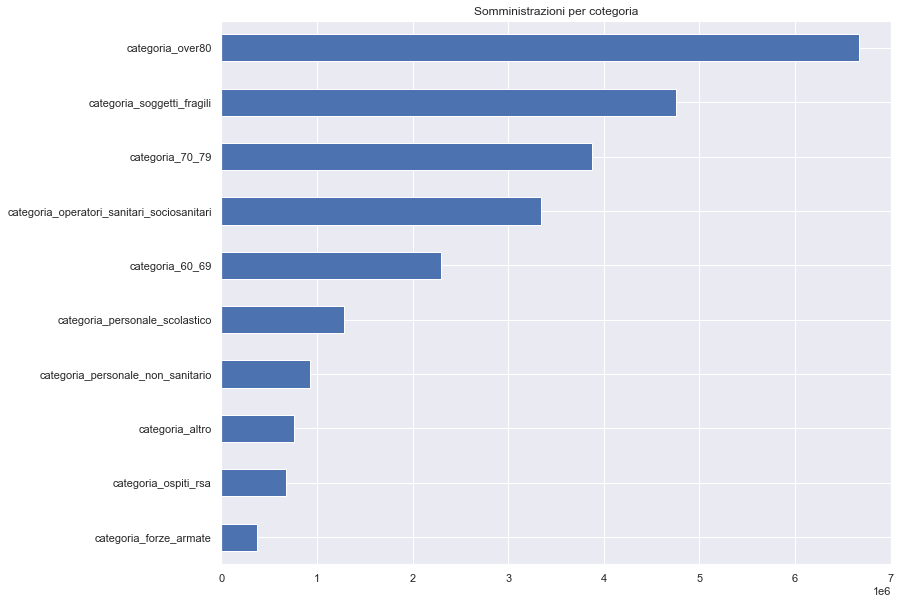

In [52]:
df_categorie = pd.Series(d)
df_categorie.sort_values().plot(kind='barh')
plt.title('Somministrazioni per cotegoria')
plt.show()

In [55]:
df_fasce_sett = u.get_dfsettimanale_from_df(df_somministrazioni_t, 'fascia_anagrafica', 'totale')
df_fasce_sett

,totale,fascia_anagrafica
data_somministrazione,,
2020-12-27,685,20-29
2021-01-03,11031,20-29
2021-01-10,52530,20-29
2021-01-17,61049,20-29
2021-01-24,21553,20-29
...,...,...
2021-04-18,5508,16-19
2021-04-25,6521,16-19
2021-05-02,10575,16-19


In [59]:
df_fasce_sett['week'] = df_fasce_sett.index.astype(str).values

<ipython-input-59-4ac495726d82>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_fasce_sett.index.weekofyear


Int64Index([52, 53,  1,  2,  3,  4,  5,  6,  7,  8,
            ...
            10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
           dtype='int64', name='data_somministrazione', length=188)

In [70]:
df_fasce_sett

,totale,fascia_anagrafica
data_somministrazione,,
2020-12-27,685,20-29
2021-01-03,11031,20-29
2021-01-10,52530,20-29
2021-01-17,61049,20-29
2021-01-24,21553,20-29
...,...,...
2021-04-18,5508,16-19
2021-04-25,6521,16-19
2021-05-02,10575,16-19


In [71]:
set(df_fasce_sett.index.astype(str).values)

{'2020-12-27',
 '2021-01-03',
 '2021-01-10',
 '2021-01-17',
 '2021-01-24',
 '2021-01-31',
 '2021-02-07',
 '2021-02-14',
 '2021-02-21',
 '2021-02-28',
 '2021-03-07',
 '2021-03-14',
 '2021-03-21',
 '2021-03-28',
 '2021-04-04',
 '2021-04-11',
 '2021-04-18',
 '2021-04-25',
 '2021-05-02',
 '2021-05-09',
 '2021-05-16'}

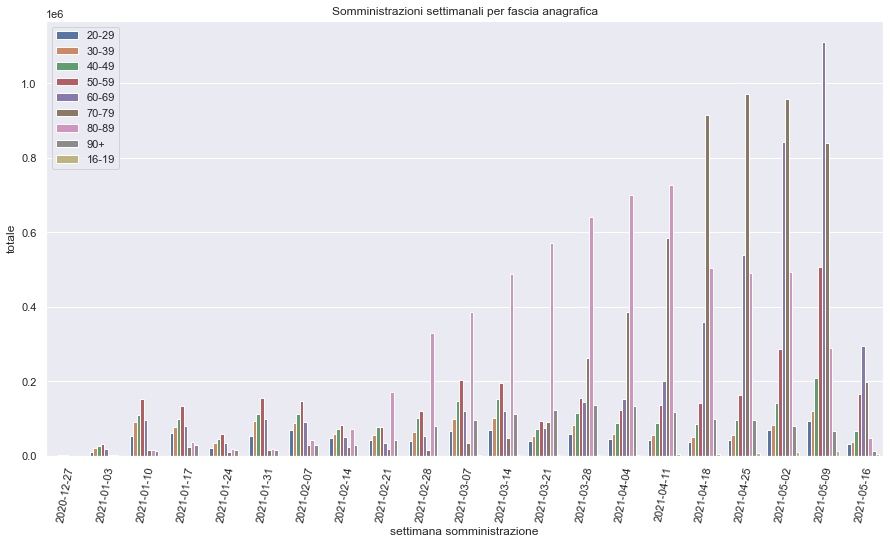

In [74]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data = df_fasce_sett, x=df_fasce_sett.index, y='totale', hue='fascia_anagrafica',ci=None, ax=ax)
plt.title('Somministrazioni settimanali per fascia anagrafica')
plt.legend(loc='upper left')
plt.xlabel('settimana somministrazione')
ax.set_xticklabels(sorted(set(df_fasce_sett.index.astype(str).values)), rotation=80)
# ax.xaxis.set_major_formatter(myFmt)
plt.show()